In [2]:
#import ROOT 
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = uproot.open("nuGun_digi_v1.edm4hep.root")

In [4]:
tree = f["events"]

In [32]:
# Get the list of branches in the tree
for branch in tree.keys():
    print(branch)

YokeEndcapCollection
YokeEndcapCollection/YokeEndcapCollection.cellID
YokeEndcapCollection/YokeEndcapCollection.energy
YokeEndcapCollection/YokeEndcapCollection.position.x
YokeEndcapCollection/YokeEndcapCollection.position.y
YokeEndcapCollection/YokeEndcapCollection.position.z
YokeEndcapCollection/YokeEndcapCollection.contributions_begin
YokeEndcapCollection/YokeEndcapCollection.contributions_end
YokeEndcapCollection#0
YokeEndcapCollection#0/YokeEndcapCollection#0.index
YokeEndcapCollection#0/YokeEndcapCollection#0.collectionID
VertexBarrelCollection
VertexBarrelCollection/VertexBarrelCollection.cellID
VertexBarrelCollection/VertexBarrelCollection.EDep
VertexBarrelCollection/VertexBarrelCollection.time
VertexBarrelCollection/VertexBarrelCollection.pathLength
VertexBarrelCollection/VertexBarrelCollection.quality
VertexBarrelCollection/VertexBarrelCollection.position.x
VertexBarrelCollection/VertexBarrelCollection.position.y
VertexBarrelCollection/VertexBarrelCollection.position.z
Vertex

In [6]:
# just have one event it seems?
hit_cell    = tree["VBTrackerHits.cellID"].array()
hit_type    = tree["VBTrackerHits.type"].array()
hit_quality = tree["VBTrackerHits.quality"].array()
hit_time    = tree["VBTrackerHits.time"].array()
hit_eDep = tree["VBTrackerHits.eDep"].array()
hit_errE = tree["VBTrackerHits.eDepError"].array()
hit_x    = tree["VBTrackerHits.position.x"].array()
hit_y    = tree["VBTrackerHits.position.y"].array()
hit_z    = tree["VBTrackerHits.position.z"].array()
i=0

for ievt in range(len(hit_cell)):
    for ihit in range(len(hit_cell[ievt])):
    
        #print(hit_cell[ievt][ihit])
        #print(hit_time[ievt][ihit])
        print("{:0.1f} {:0.1f} {:0.1f}".format( hit_x[ievt][ihit], hit_y[ievt][ihit],hit_z[ievt][ihit] ) )
        if ihit > 10 : break


48.3 -17.3 18.9
48.1 -17.8 18.6
48.2 -17.5 17.8
48.6 21.7 -65.0
-22.3 -23.2 -8.7
-50.4 54.7 32.8
-54.2 89.2 3.5
-53.0 87.5 3.6
-65.8 78.8 2.9
-66.8 80.6 2.8
-12.6 27.4 -61.5
-8.4 29.2 -58.0


In [7]:
hit_p4 = ak.zip( {"x": hit_x, "y": hit_y, "z": hit_z }, with_name="Vector3D") 


In [13]:
hit_r     = (hit_x**2 + hit_y**2)**0.5
hit_R     = (hit_x**2 + hit_y**2 + hit_z**2)**0.5
hit_phi   = np.arctan2(hit_y, hit_x)
hit_theta = np.arctan2(hit_r, hit_z)

print(ak.flatten(hit_r))
print(ak.flatten(hit_phi))
print(ak.flatten(hit_theta))

[51.3, 51.3, 51.3, 53.2, 32.2, 74.4, 104, ..., 32.4, 33, 32.3, 30.3, 30.2, 30.2]
[-0.344, -0.354, -0.348, 0.419, -2.34, ..., 1.78, 1.88, -0.296, -0.331, -0.405]
[1.22, 1.22, 1.24, 2.46, 1.84, 1.16, ..., 2.09, 2.01, 1.99, 1.63, 1.6, 1.56]


In [9]:
def plot1DHistogram(data,bins,label=""):
    
    # handle data
    data_flat = ak.flatten(data)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    plt.show()


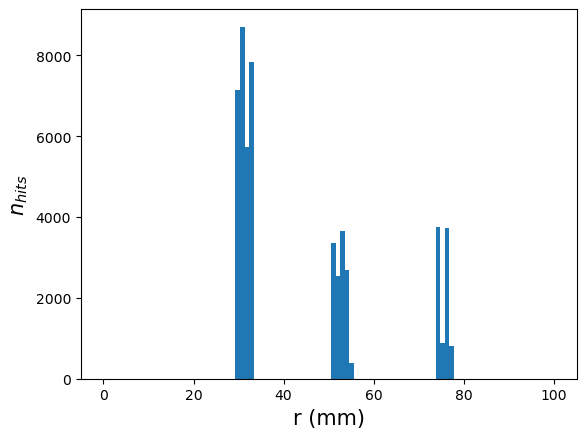

In [213]:
bins = np.linspace(0,100,100)
#print(bins)
plot1DHistogram(hit_r, bins, ";r (mm);$n_{hits}$")

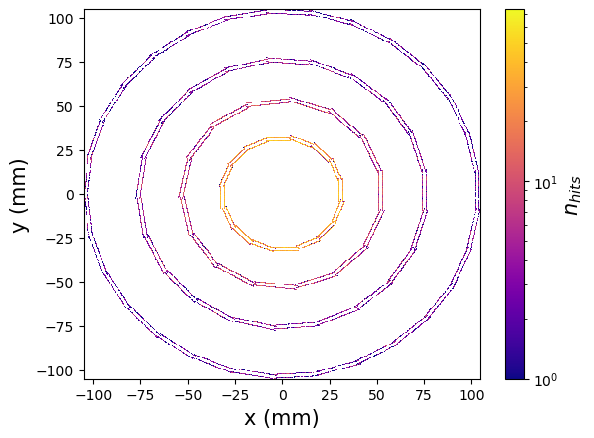

In [10]:
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()
    

plot2DHistogram(hit_x,hit_y,bins=400,label=";x (mm);y (mm);$n_{hits}$")

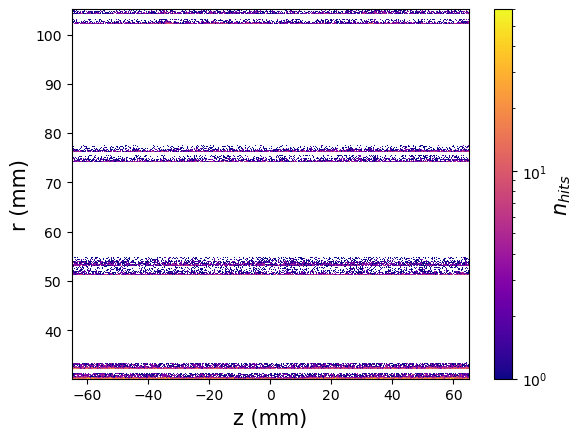

In [12]:
plot2DHistogram(hit_z,hit_r,bins=500, label=";z (mm);r (mm);$n_{hits}$")

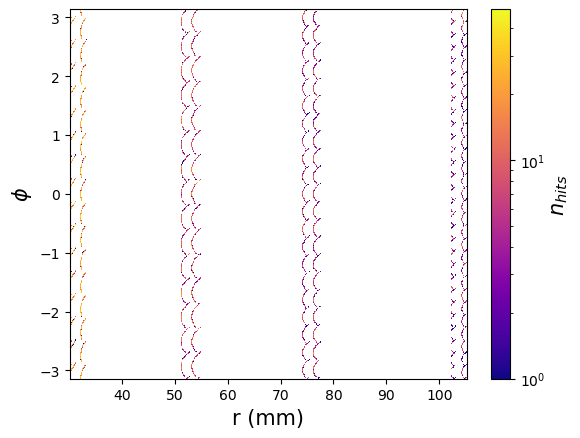

In [211]:
plot2DHistogram(hit_r,hit_phi,bins=500, label=";r (mm);$\phi$;$n_{hits}$")

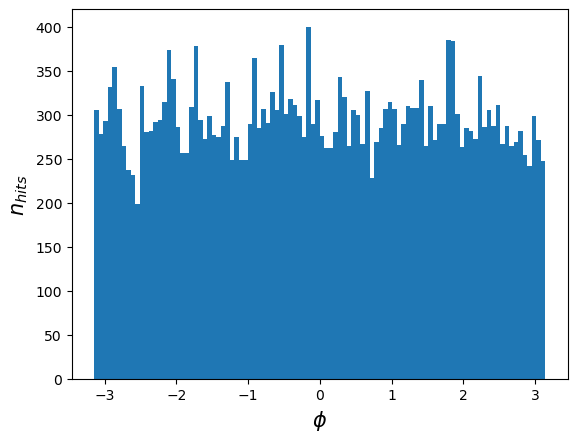

In [217]:

plot1DHistogram(hit_phi[hit_r<40],bins=100, label=";$\phi$;$n_{hits}$")


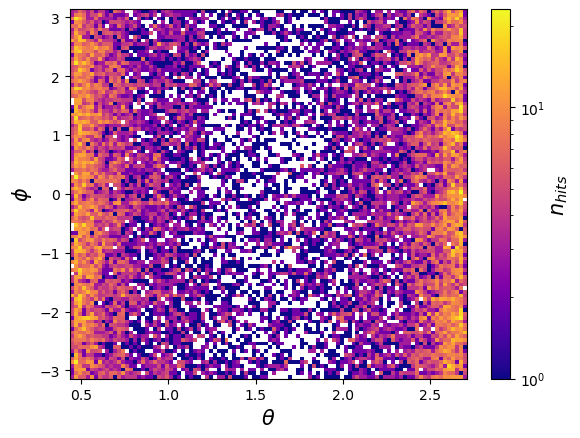

In [223]:
plot2DHistogram(hit_theta[hit_r<40], hit_phi[hit_r<40],bins=100, label=";$\\theta$;$\phi$;$n_{hits}$" )

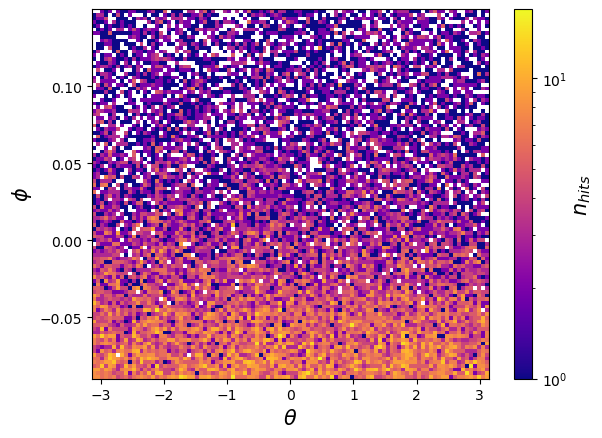

In [11]:
plot2DHistogram(hit_phi[hit_r<40], hit_time[hit_r<40],bins=100, label=";$\\theta$;$\phi$;$n_{hits}$" )

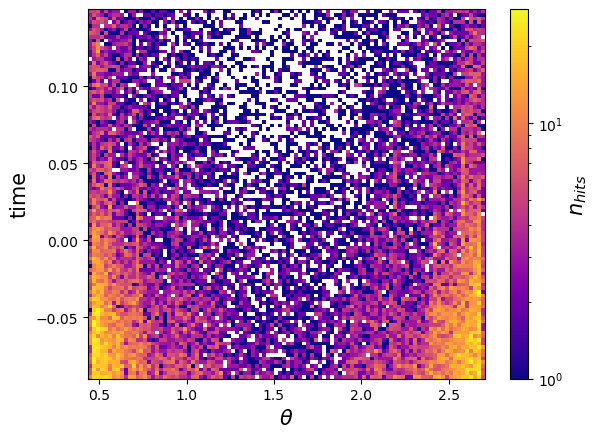

In [224]:
plot2DHistogram(hit_theta[hit_r<40], hit_time[hit_r<40],bins=100, label=";$\\theta$;time;$n_{hits}$" )

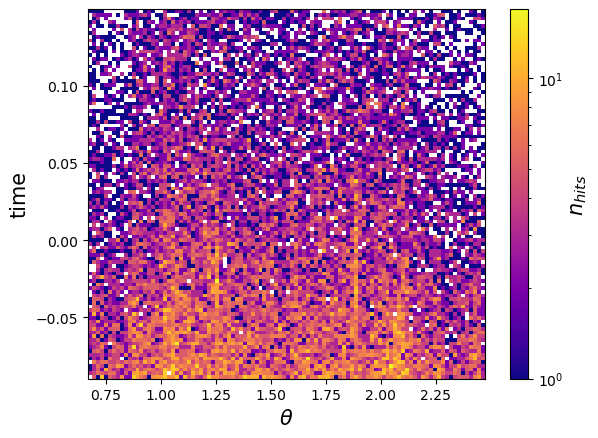

In [225]:
plot2DHistogram(hit_theta[hit_r>40], hit_time[hit_r>40],bins=100,label=";$\\theta$;time;$n_{hits}$" )

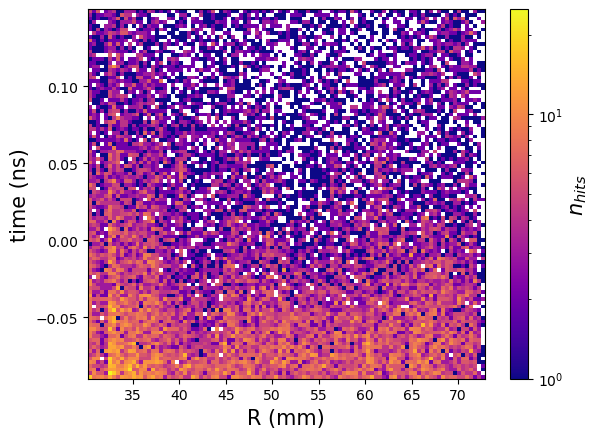

In [17]:
plot2DHistogram(hit_R[hit_r<40],hit_time[hit_r<40],bins=100,label=";R (mm);time (ns);$n_{hits}$" )